In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def setPlot(plt):
    plt.text(1945, 57,'Ukraine Population Prospects',color="#5d646f",fontsize=25,backgroundcolor="#ffffff")
    plt.text(1945, 55, 'Total population, million', color="#5d646f", fontsize=15, backgroundcolor="#ffffff")
    plt.text(2080, 8,'Data: UN World Population Prospects', color="#5d646f", fontsize=10, backgroundcolor="#ffffff")

    plt.xlim(1948, 2102)
    plt.ylim(14, 53)

    plt.annotate('estimate', (1980, 52.5), color='#4995c4', fontsize=14, backgroundcolor="#ffffff")
    plt.annotate('projection', (2050, 52.5), color='#d53f4f', fontsize=14, backgroundcolor="#ffffff")

    plt.grid(True)
    

In [99]:
def setAxes(axes):
    axes.tick_params(color="#ffffff", labelcolor=gray)
    axes.set_facecolor("#ffffff")

    axes.spines['left'].set_visible(False)
    axes.spines['top'].set_visible(False)
    axes.spines['bottom'].set_visible(False)
    axes.spines['right'].set_visible(False)
    
    axes.set_xticks([1950, 1991, 2020, 2100])

In [100]:
def findYAC(df, list_of_labels):
    y_a_c = []
    
    for l in list_of_labels:
        y_a_c.append(df[df['type']==l][df['year']==2100]['population'])

    y_a_c[np.where(labels == 'zero migration')[0][0]] -= 1
    y_a_c[np.where(labels == 'medium variant')[0][0]] += 1
    
    return y_a_c

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


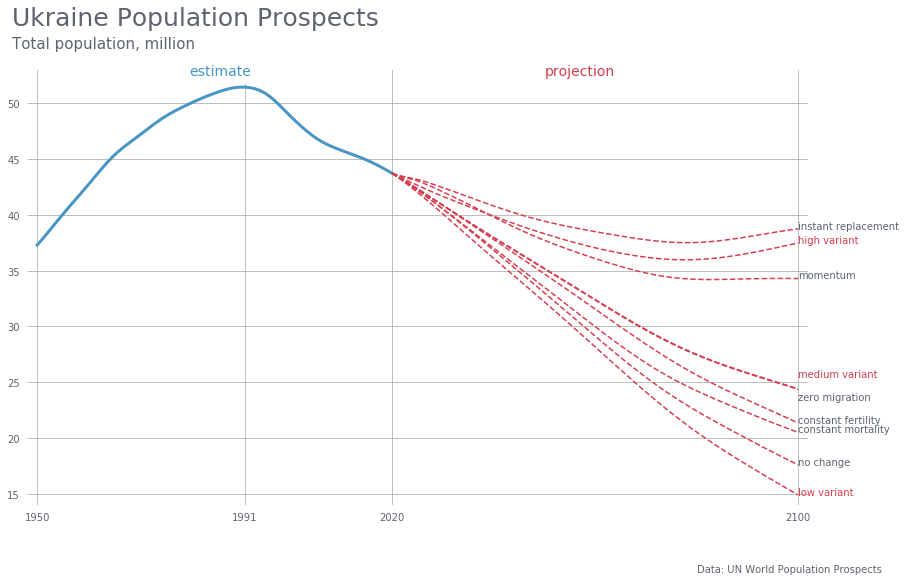

In [101]:
df = pd.read_csv('data.csv', )
df.population /= 1000

f, axes = plt.subplots(figsize=(14,8), facecolor="#ffffff", edgecolor='black')

setAxes(axes)
setPlot(plt)
plt.plot('year', 'population', data=df[df['type']=='estimate'], color='#4995c4', linewidth=3)

list_of_labels = df.type.unique()[1:]
colors = ['#d53f4f' if 'variant' in label else "#5d646f" for label in list_of_labels]

for label, color, y in zip(list_of_labels, colors, findYAC(df, list_of_labels)):
    plt.plot('year', 'population', data=df[df['type']==label], color='#d53f4f', linestyle='--')
    plt.annotate(label, (2100, y), color=color, fontsize=10)
    
plt.show()
